# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder

In [3]:
import os

print(os.getcwd())

/home/sundooedu/Creditcard-use-analysis-dev./to_real


In [4]:
# # zip 파일로 된 데이터 파일 풀기 - Data 폴더에 압축 풀기

# import zipfile
# with zipfile.ZipFile("../Data/jeju_data_ver1(원본).zip","r") as zip_ref:
#     zip_ref.extractall("../Data")

In [5]:
df = pd.read_csv('../Data/201901-202003.csv')

In [6]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [7]:
df.groupby('STD_CLSS_NM')['AMT'].sum()

STD_CLSS_NM
건강보조식품 소매업                 105126364380
골프장 운영업                    595701968828
과실 및 채소 소매업                618928801283
관광 민예품 및 선물용품 소매업           15129406137
그외 기타 분류안된 오락관련 서비스업           37246490
그외 기타 스포츠시설 운영업              2731915234
그외 기타 종합 소매업              1025691118171
기타 대형 종합 소매업              7328854819388
기타 수상오락 서비스업                 1671308986
기타 외국식 음식점업                623167678948
기타 주점업                     164753620805
기타음식료품위주종합소매업             1569246626978
내항 여객 운송업                   42015061681
마사지업                        20199890964
면세점                        404512192532
버스 운송업                     230236675997
비알콜 음료점업                  1143497863742
빵 및 과자류 소매업                893591674917
서양식 음식점업                  1748358904526
수산물 소매업                    297031773253
슈퍼마켓                      6730329364274
스포츠 및 레크레이션 용품 임대업        1245725426753
여관업                        258904036530
여행사업                       109016697282
욕탕업                        1

In [8]:
df.shape

(24697792, 12)

## 목표 : 신용카드 사용 내역 데이터를 활용한 지역별, 업종별 월간 카드 사용 총액 예측

### 데이터 기간: 2019.01 ~ 2020.03 (15개월)
- REG_YYMM :년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
- AGE: 연령대
- SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
- FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수 (명)
- AMT : 이용금액 (원) - 종속변수
- CNT : 이용건수 (건)

**Col:12 , Row: 24,697,792**

submission data: **id, REG_YYMM, CARD_SIDO_NM, STD_CLSS_NM, AMT**

**한글 폰트 설정**

In [9]:
from matplotlib import font_manager, rc
# window >
font_name = font_manager.FontProperties(fname="/Windows/Fonts/NanumGothicCoding.ttf").get_name()
# linux >
# font_name = font_manager.FontProperties(fname="/home/sundooedu/.local/share/fonts/NanumGothicCoding.ttf").get_name()
# gram >
# font_name = font_manager.FontProperties(fname="/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: '/Windows/Fonts/NanumGothicCoding.ttf'

# EDA

## 결측값

In [10]:
df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

결측값이 약 20만개정도 있는 것을 확인할 수 있다.

In [11]:
df[df['HOM_CCG_NM'].isnull()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
420,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,30s,1,2,3,58000,3
421,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,40s,1,3,3,263000,4
1189,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,1,1,3,176540,3
1190,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,2,1,4,234880,6
1191,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,30s,1,2,4,177640,5
...,...,...,...,...,...,...,...,...,...,...,...,...
24697496,202003,충북,충주시,한식 음식점업,세종,NaN,30s,2,2,5,188500,8
24697497,202003,충북,충주시,한식 음식점업,세종,NaN,40s,1,3,18,1056500,28
24697498,202003,충북,충주시,한식 음식점업,세종,NaN,50s,1,4,25,770150,35
24697499,202003,충북,충주시,한식 음식점업,세종,NaN,50s,2,4,4,19500,4


결측값은 가맹점 시군구와 카드 사용자의 거주 시군구이다.\
해당 값은 시도 값이 '세종'으로, 세종의 시군구가 NaN 값으로 들어간 것을 알 수 있다.\
이후 해당 컬럼을 독립변수에서 제외 할 예정이므로, 결측값을 따로 처리하지 않는다.

## 각 컬럼 분석하기

### 카드 결제 시도

In [12]:
df.CARD_SIDO_NM.value_counts()

서울    6259502
경기    5188230
부산    2030810
인천    1278410
강원    1230355
경남    1222818
경북    1204831
충남    1178159
충북     834707
전북     829466
전남     819291
대구     758424
대전     523121
제주     497503
광주     432150
울산     322802
세종      87213
Name: CARD_SIDO_NM, dtype: int64

서울 - 경기 - 부산 - 인천 - 강원 순으로 카드 결제 레코드가 많음

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backe

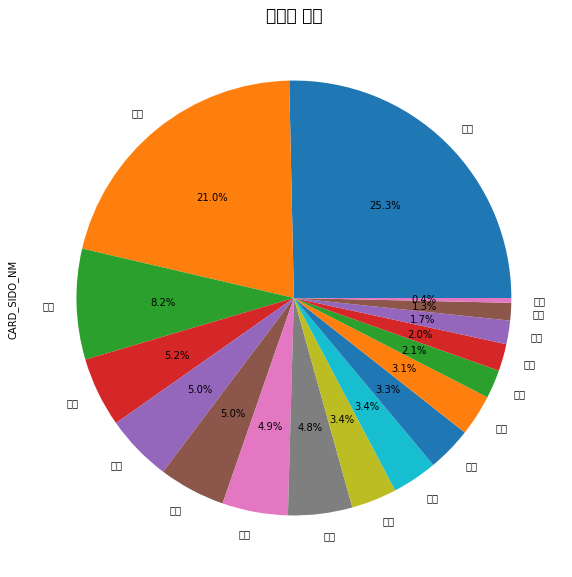

In [13]:
df.CARD_SIDO_NM.value_counts().plot.pie(autopct='%1.1f%%', figsize=[20,10])
plt.title('시도별 비중', fontsize=17)
plt.show()

In [14]:
df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values(axis = 0, ascending = False)

CARD_SIDO_NM
서울    14677131049031
경기    14201885234869
부산     4491306031541
경남     3485130029864
인천     3056247462913
대구     3020064352604
경북     2767620595248
충남     2103197375108
전북     1961230185341
전남     1839760777139
광주     1705650360934
강원     1589611299919
충북     1465437185923
제주     1343582224768
울산     1255213605740
대전     1128913460716
세종      204045817348
Name: AMT, dtype: int64

Text(0.5, 1.0, '시도별 이용금액')

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backend

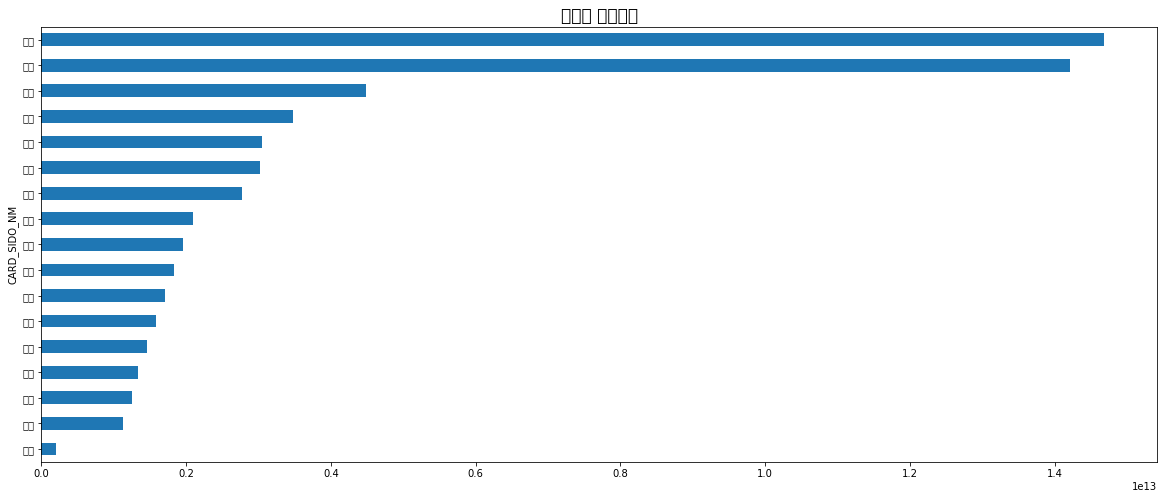

In [15]:
df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values().plot(kind='barh',figsize=[20,8])
plt.title('시도별 이용금액', fontsize=17)

### 카드 결제 업종

Text(0.5, 1.0, '업종별 비중')

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backe

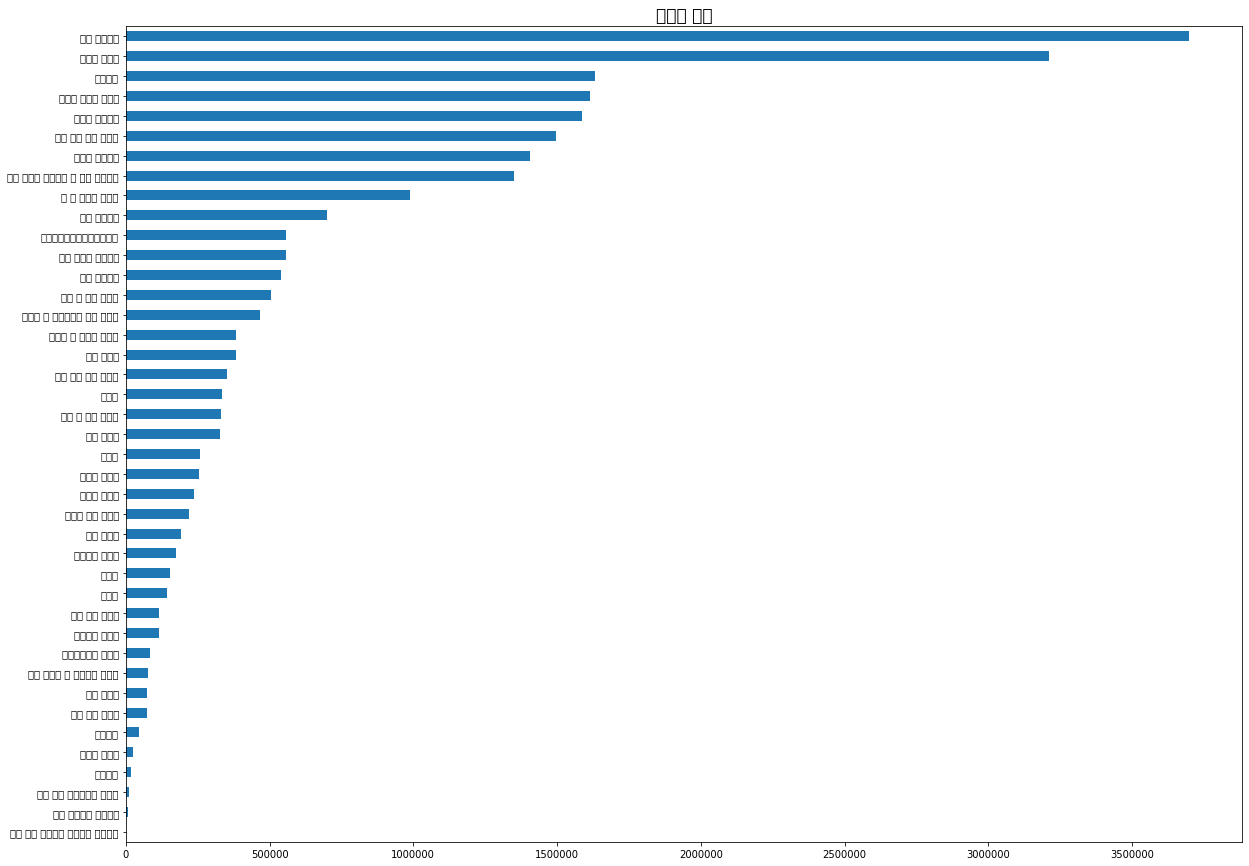

In [16]:
df.STD_CLSS_NM.value_counts().sort_values().plot(kind='barh',figsize=[20,15])
plt.title('업종별 비중', fontsize=17)

업종별 결제 레코드는 한식 음식점업 - 체인화 편의점 - 슈퍼마켓 순으로 높다.\
다만, 해당 레코드는 결제 건별 데이터가 아니므로 가장 높은 순서라고 해도 가장 빈번하게 이용된다고 말할 수는 없다.\
최다 이용수는 CNT를 통해 도출할 수 있다.

Text(0.5, 1.0, '업종별 비중(이용 금액별)')

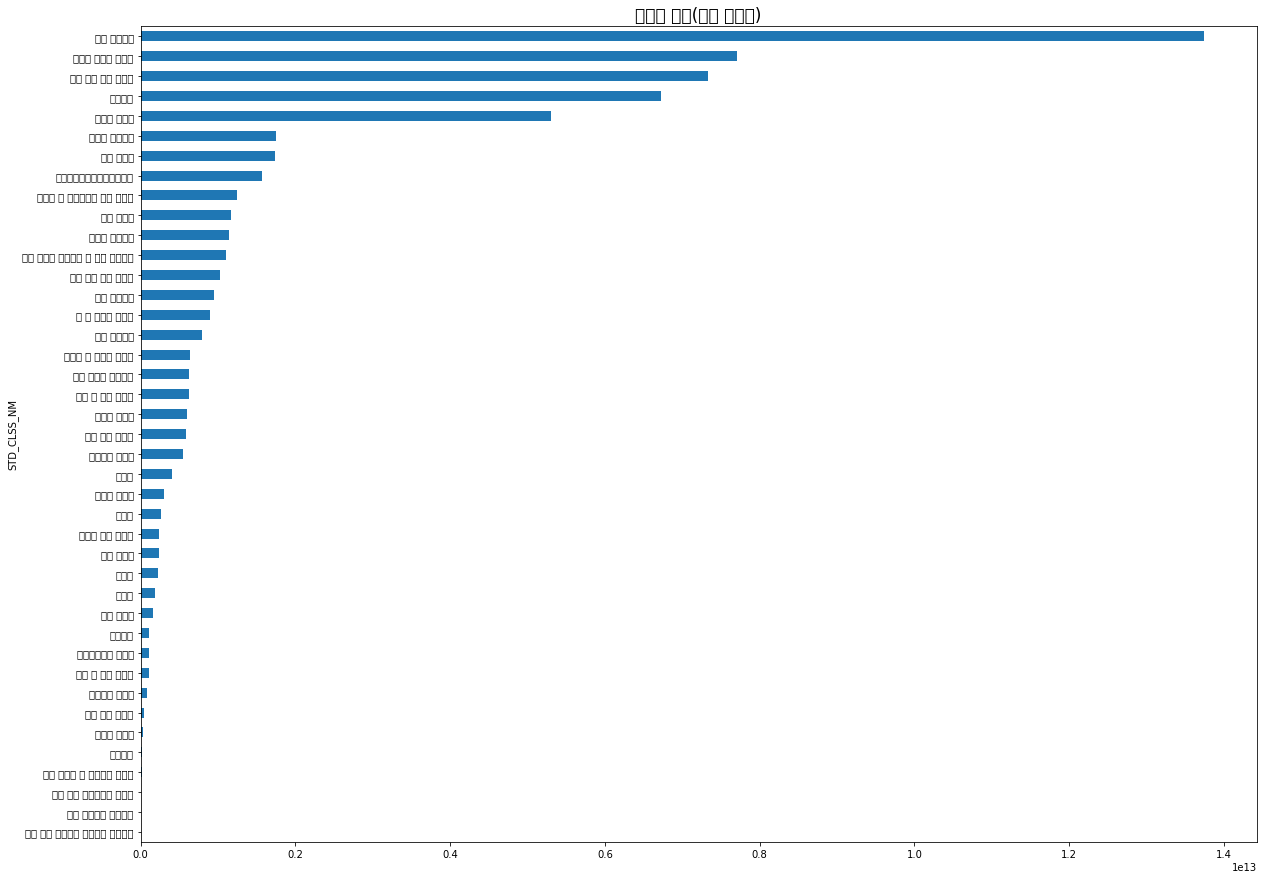

In [17]:
df.groupby('STD_CLSS_NM')['AMT'].sum().sort_values().plot(kind='barh',figsize=[20,15])
plt.title('업종별 비중(이용 금액별)', fontsize=17)

반면 업종별 결제 금액은 한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 순으로 높다.

### 카드 결제 성별

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)


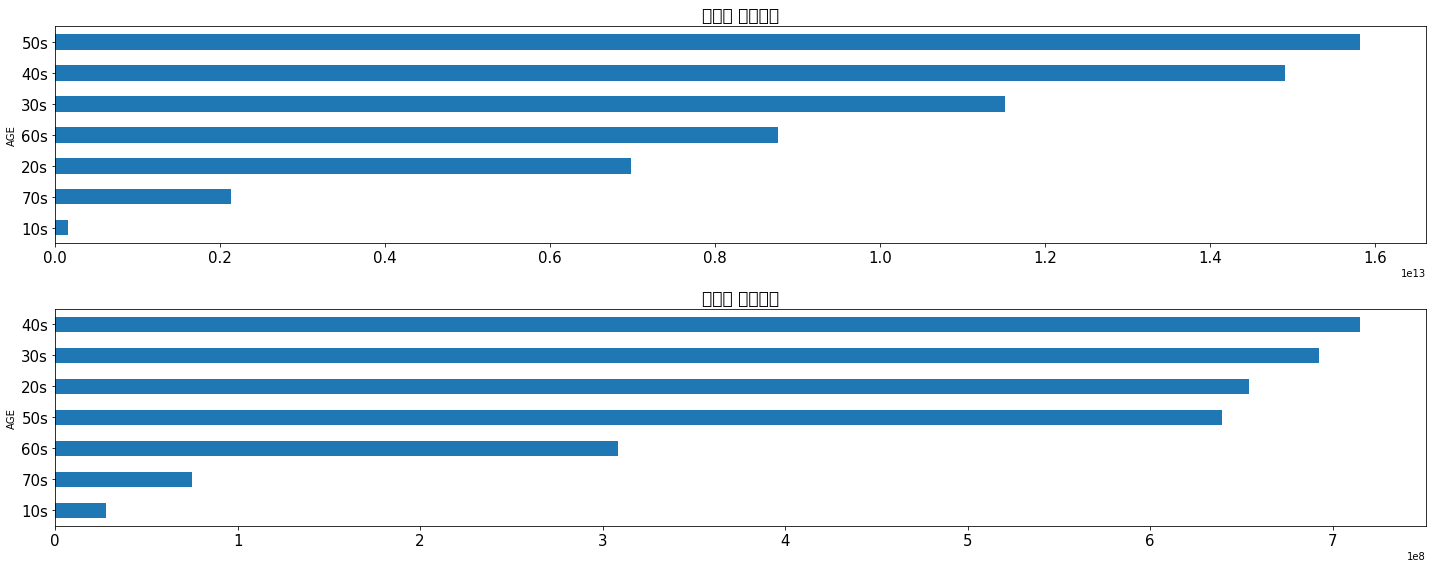

In [18]:
f,ax = plt.subplots(2,1,figsize=(20,40))

df.groupby('AGE')['AMT'].sum().sort_values().plot(kind='barh',figsize=[20,8],fontsize=15, ax=ax[0])
ax[0].set_title('연령별 이용금액', fontsize=17)

df.groupby('AGE')['CNT'].sum().sort_values().plot(kind='barh',figsize=[20,8],fontsize=15, ax=ax[1])
ax[1].set_title('연령별 이용건수', fontsize=17)

plt.tight_layout()
plt.show()

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


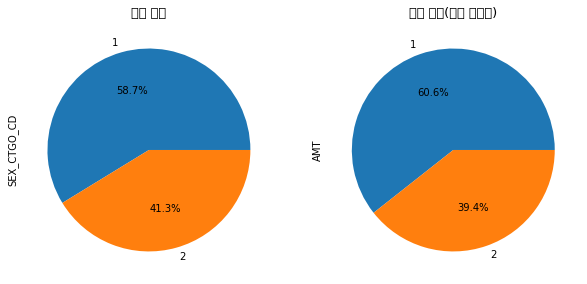

In [19]:
f,ax = plt.subplots(1,2,figsize=(10,7))
df.SEX_CTGO_CD.value_counts().plot.pie(autopct='%1.1f%%', figsize=[10,7], ax=ax[0])
ax[0].set_title('성별 비중', fontsize=13)

df.groupby('SEX_CTGO_CD')['AMT'].sum().plot.pie(autopct='%1.1f%%', figsize=[10,7], ax=ax[1])
ax[1].set_title('성별 비중(이용 금액별)', fontsize=13)

plt.show()

### 카드 결제 가족 구성 형태

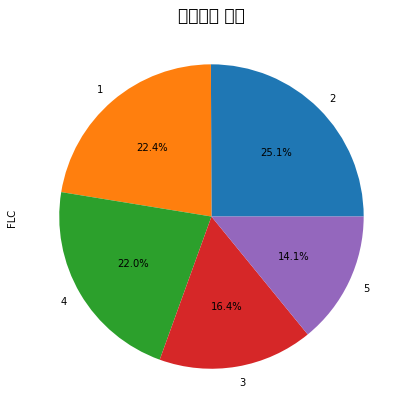

In [20]:
df.FLC.value_counts().plot.pie(autopct='%1.1f%%', figsize=[10,7])
plt.title('이용가구 비중', fontsize=17)
plt.show()

 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

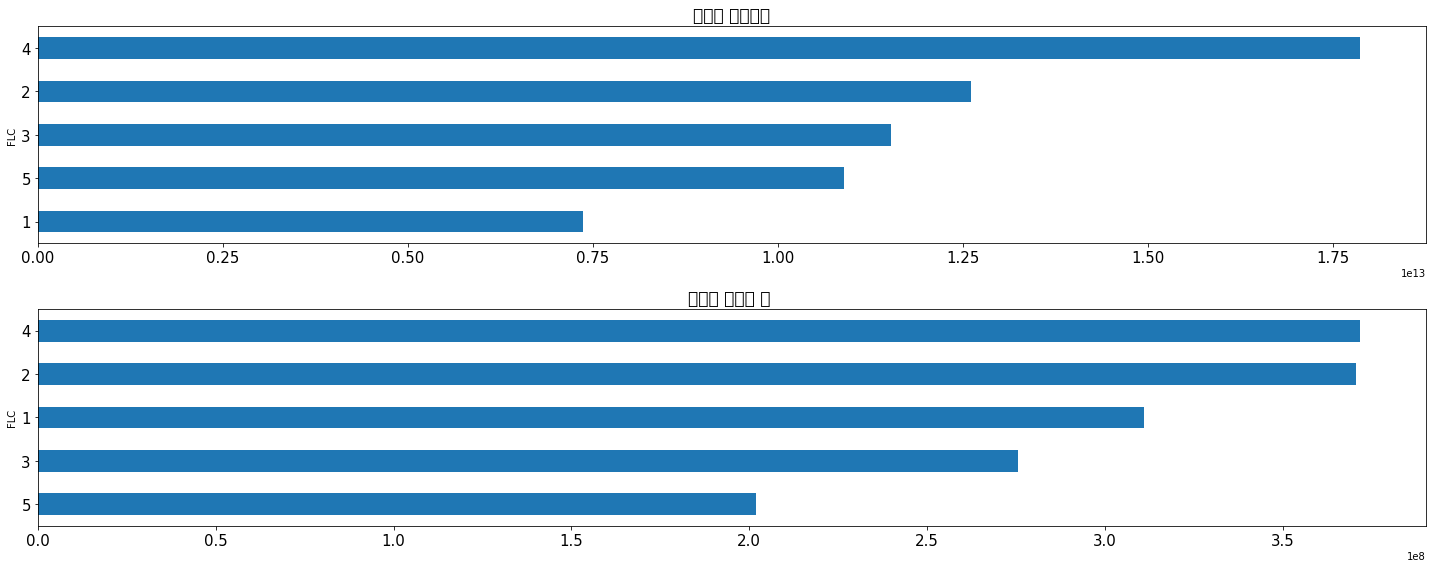

In [21]:
f,ax = plt.subplots(2,1,figsize=(20,40))

df.groupby('FLC')['AMT'].sum().sort_values().plot(kind='barh',figsize=[20,8],fontsize=15, ax=ax[0])
ax[0].set_title('가구별 이용금액', fontsize=17)

df.groupby('FLC')['CSTMR_CNT'].sum().sort_values().plot(kind='barh',figsize=[20,8],fontsize=15, ax=ax[1])
ax[1].set_title('가구별 이용객 수 ', fontsize=17)
plt.tight_layout()
plt.show()

### 카드 이용 년월

Text(0.5, 1.0, '날짜별 이용고객 수')

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/

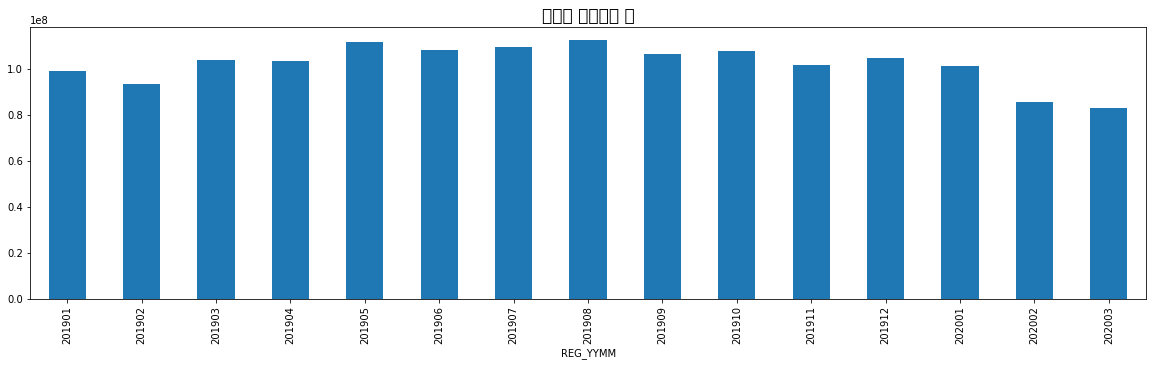

In [22]:
df.groupby('REG_YYMM')['CSTMR_CNT'].sum().plot(kind='bar', figsize=[20,5])
plt.title('날짜별 이용고객 수', fontsize=17)

월별 사용 금액은 비슷하지만,\
2020년 2월-3월에 급격히 줄어든 것을 볼 수 있다.

# Data Cleansing & Pre-Processing

In [24]:
# Random Forest
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# Deep Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [25]:
ndf = df.copy()

In [26]:
ndf = ndf.drop(['CARD_CCG_NM','HOM_CCG_NM'], axis=1)

In [27]:
ndf.AGE =ndf.AGE.str.replace('s','')

In [28]:
# 인코딩
dtypes = ndf.dtypes
encoders = {}
for column in ndf.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(ndf[column])
        encoders[column] = encoder
        
for column in encoders.keys():
    encoder = encoders[column]
    ndf[column] = encoder.transform(ndf[column])

In [29]:
# 날짜 년,월 분리
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

ndf['year'] = ndf['REG_YYMM'].apply(lambda x: grap_year(x))
ndf['month'] = ndf['REG_YYMM'].apply(lambda x: grap_month(x))
ndf = ndf.drop(['REG_YYMM'], axis=1)

In [30]:
ndf

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,0,0,0,1,1,1,4,311200,4,2019,1
1,0,0,0,2,1,2,7,1374500,8,2019,1
2,0,0,0,2,2,2,6,818700,6,2019,1
3,0,0,0,3,1,3,4,1717000,5,2019,1
4,0,0,0,3,1,4,3,1047300,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
24697787,16,40,16,2,1,2,3,43300,4,2020,3
24697788,16,40,16,3,1,3,3,35000,3,2020,3
24697789,16,40,16,4,1,4,4,188000,6,2020,3
24697790,16,40,16,4,2,4,4,99000,6,2020,3


# Feature Engineering & Initial Modeling

In [31]:
ndf = ndf.drop(['CSTMR_CNT', 'CNT'], axis=1)

In [32]:
ndf.tail()

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,year,month
24697787,16,40,16,2,1,2,43300,2020,3
24697788,16,40,16,3,1,3,35000,2020,3
24697789,16,40,16,4,1,4,188000,2020,3
24697790,16,40,16,4,2,4,99000,2020,3
24697791,16,40,16,5,1,5,194000,2020,3


In [33]:
X_train, X_test, y_train, y_test = train_test_split(ndf.drop('AMT', axis=1),np.log1p(ndf['AMT']),
                                                    train_size=0.002,test_size=0.0003, random_state=0, shuffle=True)

In [34]:
X_train.shape, X_test.shape

((49395, 8), (7410, 8))

# Model Tuning & Evaluation

## Model Tuning - Random Forest Model

In [35]:
model = RandomForestRegressor(n_estimators=1500, max_features=8, random_state=0, n_jobs=-1).fit(X_train, y_train)

/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sundooedu/anaconda3/lib/python3.7/site-packages/matplotlib/backe

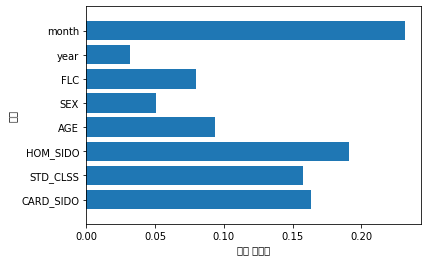

In [36]:
# 특성 중요도 시각화

def plot_feature_importances_cancer(model):
    n_features = ndf.drop('AMT', axis=1).shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),['CARD_SIDO','STD_CLSS','HOM_SIDO','AGE','SEX','FLC','year','month'])
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(model)

In [37]:
# 평균제곱오차

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse=', mse)
print('rmse=', mse**0.5)

mse= 2.439845532564667
rmse= 1.5620004905776013


In [38]:
# 상관관계

import pandas as pd
preddf = pd.DataFrame({'y_true':y_test, 'y_pred':y_pred})
cor = preddf['y_true'].corr(preddf['y_pred'])
print('cor=', cor)

cor= 0.4636473053883796


## Model Tuning - Deep Learning

In [39]:
model= tf.keras.Sequential()

In [40]:
model.add(layers.Input(shape=x_train.shape[1]))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu',
                     # kernel_regularizer=tf.keras.regularizers.l2(regular),
                     # activity_regularizer=tf.keras.regularizers.l2(regular)
                      ))

model.add(Dropout(0.5))


model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(lr =0.003),loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])

NameError: name 'x_train' is not defined

In [ ]:
hist = model.fit(X_train,y_train,epochs=20 , batch_size = 516 , validation_split =0.3)

In [ ]:
model.evaluate(X_test,y_test, batch_size=516)

In [ ]:
plt.plot(hist.history['mean_squared_logarithmic_error'],'x--')
plt.plot(hist.history['val_mean_squared_logarithmic_error'],'x--')

## Evaluation

In [ ]:
# 예측 템플릿 만들기

CARD_SIDO_NMs = ndf['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = ndf['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = ndf['HOM_SIDO_NM'].unique()
AGEs          = ndf['AGE'].unique()
SEX_CTGO_CDs  = ndf['SEX_CTGO_CD'].unique()
FLCs          = ndf['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                         for year in years:
                                for month in months:
                                    temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month'])

In [ ]:
temp

In [ ]:
# 예측 

pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
temp

In [ ]:
# 디코딩 

temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
temp

In [ ]:
# 제출 파일 만들기

submission = pd.read_csv('../Data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('./submission.csv', encoding='utf-8-sig')
submission.head()